<a href="https://colab.research.google.com/github/JohnOngeri/CNN-in-class-activity-breakout-3/blob/main/CNN_Inclass_Activity_Breakout3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clinton Tanaka Pikita - We could have gotten 100% if we worked quicker.

Gaius Irakiza - i think we needed more Training data to make our model more robust.

Nelly Iyabikoze-I think we could have clarified the task requirements earlier and be quick in order to get 100 pts.

John Ongeri Ouma. A brief comment on what each label represents would have improved clarity

Chol Daniel- We coud have be more perfect if there was enough time.

In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from PIL import Image

In [11]:
import numpy as np
from PIL import Image
import os

def load_and_preprocess_images(image_paths, target_size=(28, 28)):
    if len(image_paths) < 4:
        raise ValueError("At least 4 images are required.")

    images = []
    for path in image_paths:
        if not os.path.exists(path):
            print(f"Warning: File not found - {path}")
            continue
        try:
            # Open and convert to grayscale
            img = Image.open(path).convert('L')
            # Resize
            img = img.resize(target_size)
            # Convert to array and normalize
            img_array = np.array(img).reshape(*target_size, 1) / 255.0
            images.append(img_array)
        except Exception as e:
            print(f"Error loading image {path}: {e}")
            continue

    if len(images) < 4:
        raise ValueError("Fewer than 3 valid images could be loaded.")

    return np.array(images)

# Use your confirmed paths
image_paths = [
    "/content/Lion images.webp",
    "/content/cat images.webp",
    "/content/cow images.jpg",
    "/content/dog images.jpg"
]

# Process images
processed_images = load_and_preprocess_images(image_paths)
print("Processed images shape:", processed_images.shape)


Processed images shape: (4, 28, 28, 1)


In [12]:
# Load and preprocess
X_train = load_and_preprocess_images(image_paths)

# labels
y_train = np.array([0, 1, 0, 1])

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (4, 28, 28, 1)
y_train shape: (4,)


In [26]:
def train_model(optimizer, lr=0.01, regularizer=None, dropout_rate=0.0):
    layers = [
        tf.keras.layers.Flatten(input_shape=(28, 28))
    ]

    # Add hidden layer with optional regularization
    if regularizer == 'l1':
        layers.append(tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l1(0.01)))
    elif regularizer == 'l2':
        layers.append(tf.keras.layers.Dense(128, activation='relu',
                          kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    else:  # No weight regularization
        layers.append(tf.keras.layers.Dense(128, activation='relu'))

    # Add dropout if specified
    if dropout_rate > 0:
        layers.append(tf.keras.layers.Dropout(dropout_rate))

    # Output layer
    layers.append(tf.keras.layers.Dense(4, activation='softmax'))

    model = tf.keras.Sequential(layers)

    model.compile(optimizer=optimizer(learning_rate=lr),
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    config_name = f"{optimizer.__name__} (lr={lr})"
    if regularizer:
        config_name += f" + {regularizer.upper()}"
    if dropout_rate > 0:
        config_name += f" + Dropout({dropout_rate})"

    print(f"\nTraining: {config_name}")
    history = model.fit(X_train, y_train, epochs=5, batch_size=4, verbose=1)
    return history

# Test configurations
optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD, tf.keras.optimizers.RMSprop]
learning_rates = [0.001, 0.01, 0.1]
regularizers = [None, 'l1', 'l2']  # Test with different regularization types
dropout_rates = [0.0, 0.2]         # Test with and without dropout

for opt in optimizers:
    for lr in learning_rates:
        for reg in regularizers:
            for do_rate in dropout_rates:
                # Skip redundant combinations (no need for both L1/L2 and dropout simultaneously)
                if (reg is not None and do_rate > 0):
                    continue
                train_model(opt, lr, regularizer=reg, dropout_rate=do_rate)


Training: Adam (lr=0.001)
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step - accuracy: 0.0000e+00 - loss: 1.6543
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7417
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.5379
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 1.0000 - loss: 0.4094
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.3199

Training: Adam (lr=0.001) + Dropout(0.2)
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step - accuracy: 0.5000 - loss: 0.7871
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.5000 - loss: 0.9690
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 1.0000 - loss: 0.3980
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 1.0000 - loss: 0.3172
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.7500 - loss: 0.4352

Training: Adam (lr=0.001) + L1
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 977ms/step - accuracy: 0.5000 - los

In [27]:
# Add model summary here
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 2)      │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 2)      │            38 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 312)            │       160,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 24)             │         7,512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 757,962 (2.89 MB)

 Trainable params: 757,962 (2.89 MB)

 Non-trainable params: 0 (0.00 B)

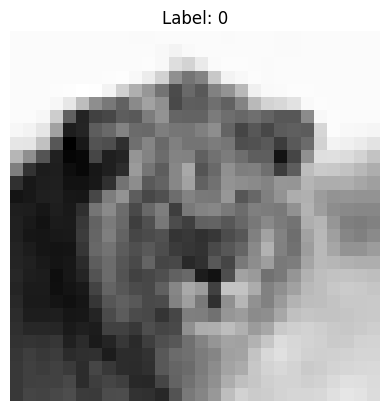

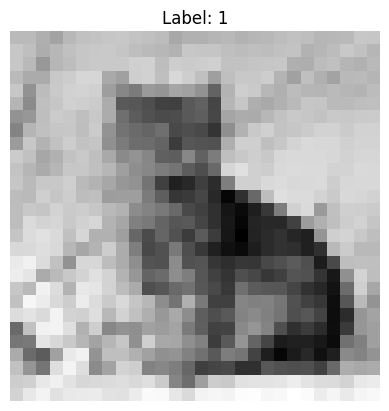

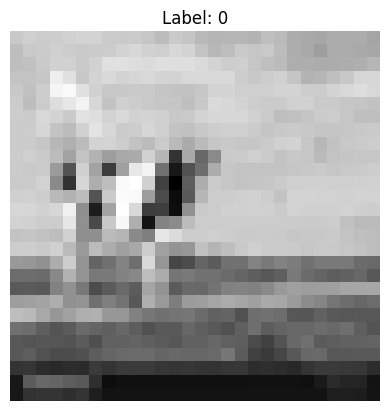

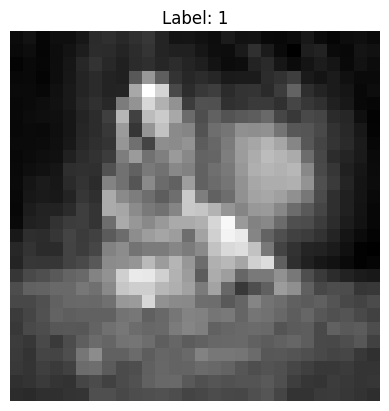

In [25]:
import matplotlib.pyplot as plt

for i in range(len(X_train)):
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
    plt.show()
